In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

def Delete_empty_rows(data):
    #Remove Empty Values
    temp=(data.T != 0).any()
    data = data[temp]
    return data

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
columns=['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']

#High Perturbation System Analysis
Num_systh = highPerturbation['ident'].values[-1]+1
highp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systh):
    Current_syst = highPerturbation[highPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:12]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    highp_vars.loc[i]=row_vals
    
    
#Low Perturbation System Analysis
Num_systl = lowPerturbation['ident'].values[-1]+1
lowp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systl):
    Current_syst = lowPerturbation[lowPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:12]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    lowp_vars.loc[i]=row_vals

## Delete Empty Rows

In [4]:
lowp=pd.DataFrame(lowp_vars, columns=columns)
highp=pd.DataFrame(highp_vars, columns=columns)

lowp=Delete_empty_rows(lowp)
highp=Delete_empty_rows(highp)

# LowP

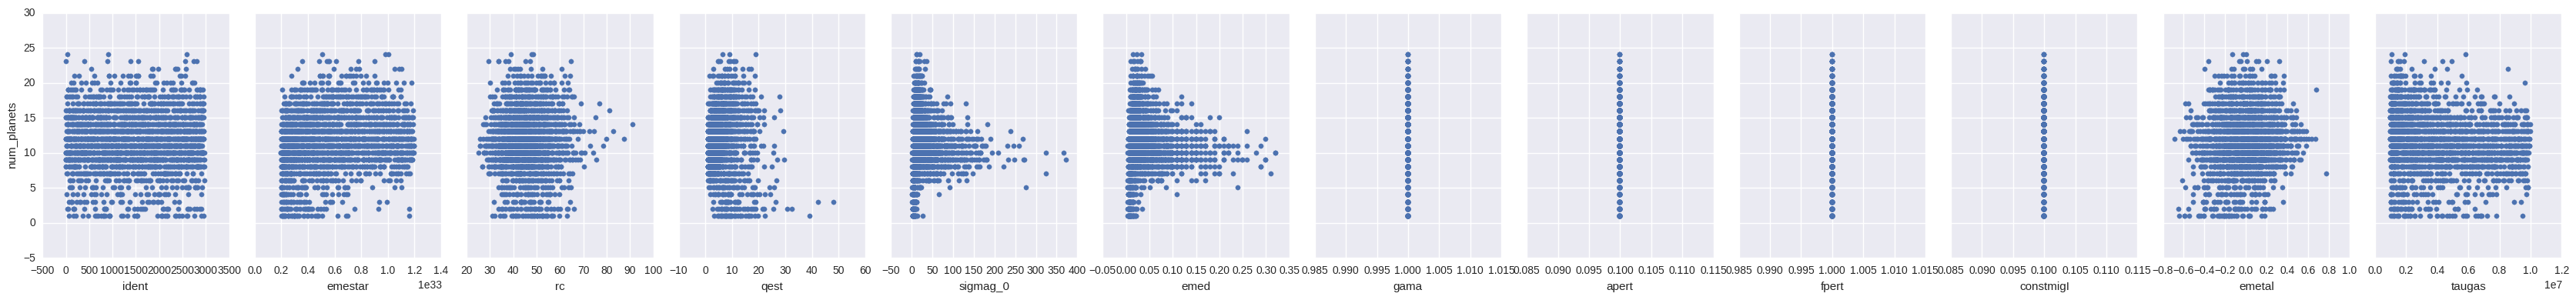

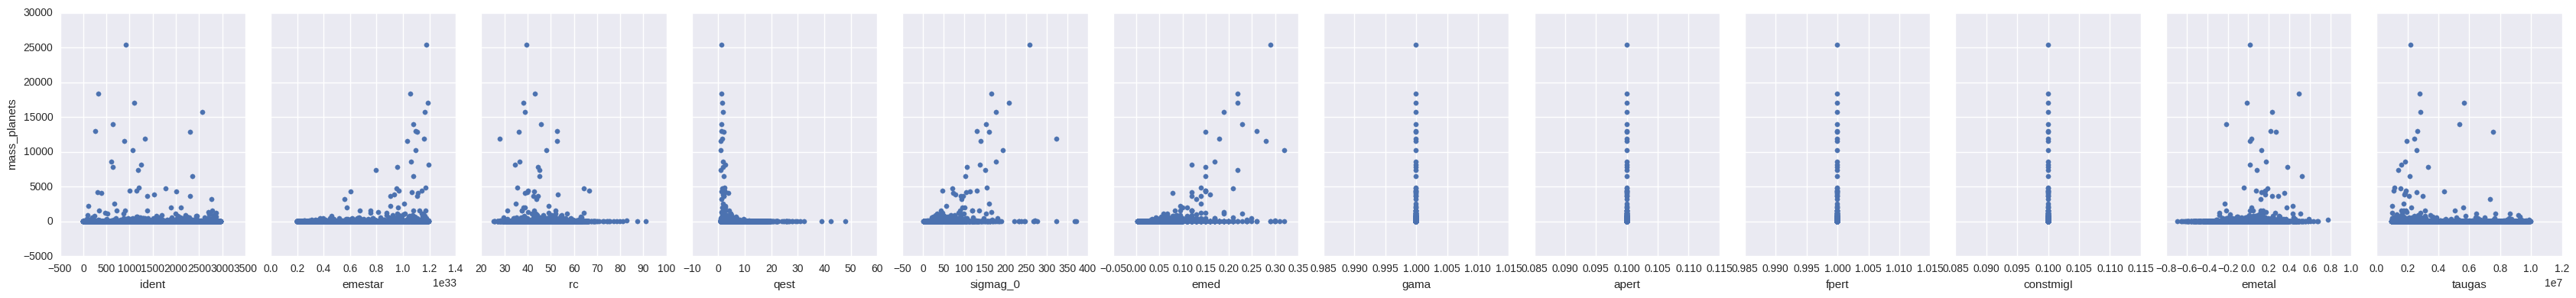

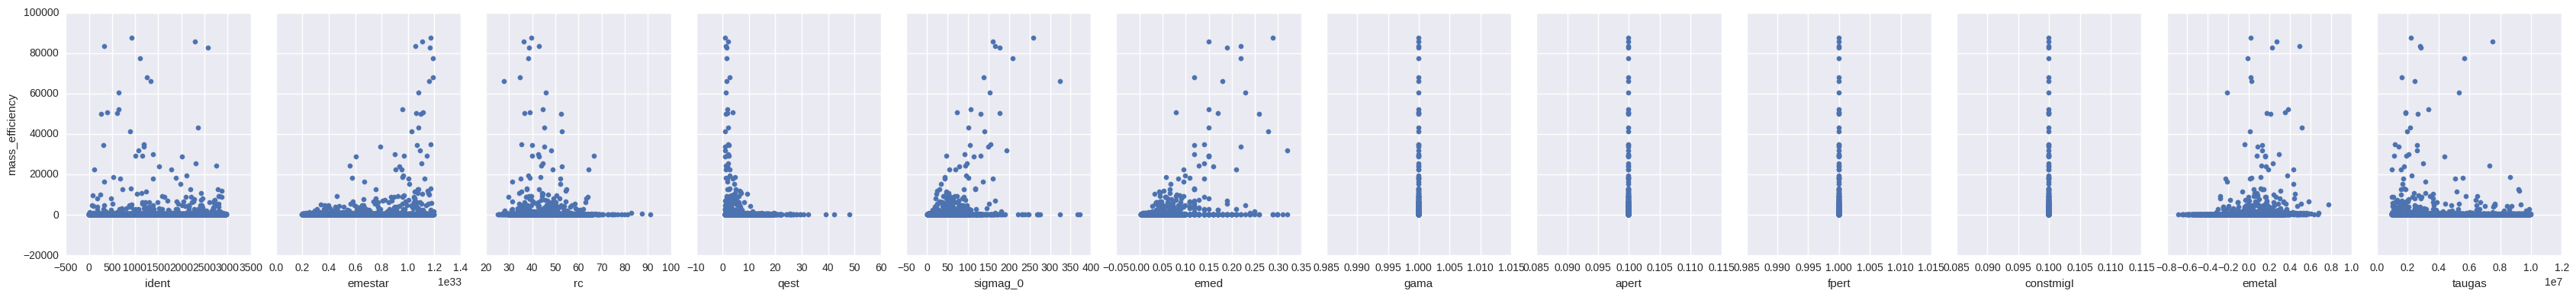

In [5]:
data = ['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
target = ['num_planets','mass_planets','mass_efficiency']

X=lowp[data]
Y=lowp[target]

for i in target:
    sns.pairplot(lowp, x_vars=data, y_vars=i, size=4, aspect=0.7)

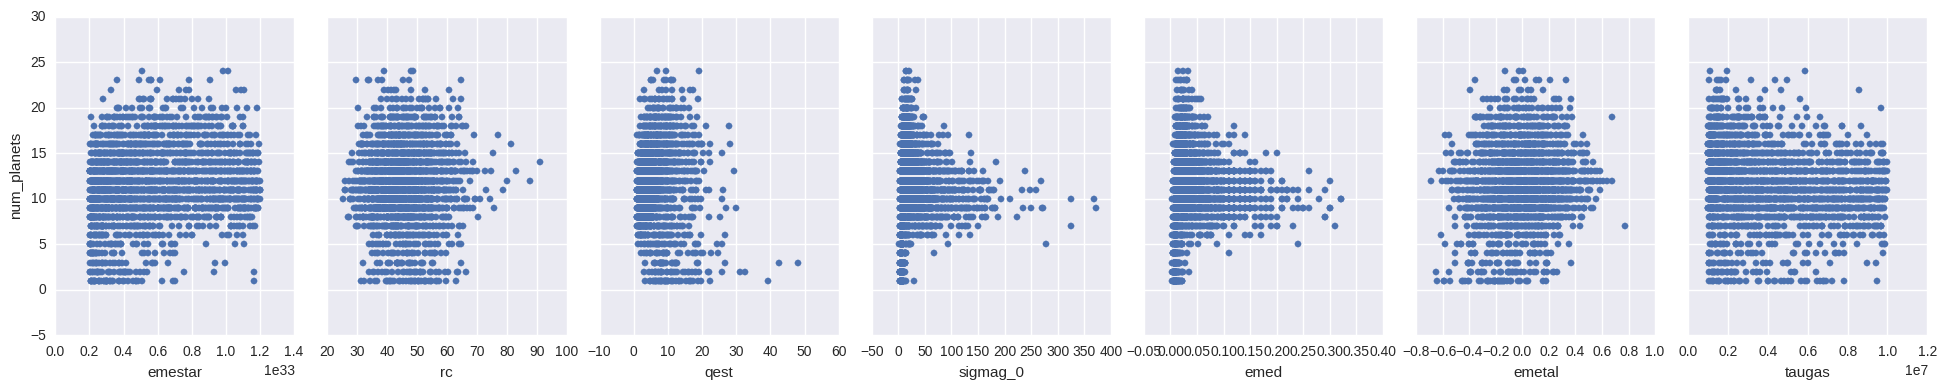

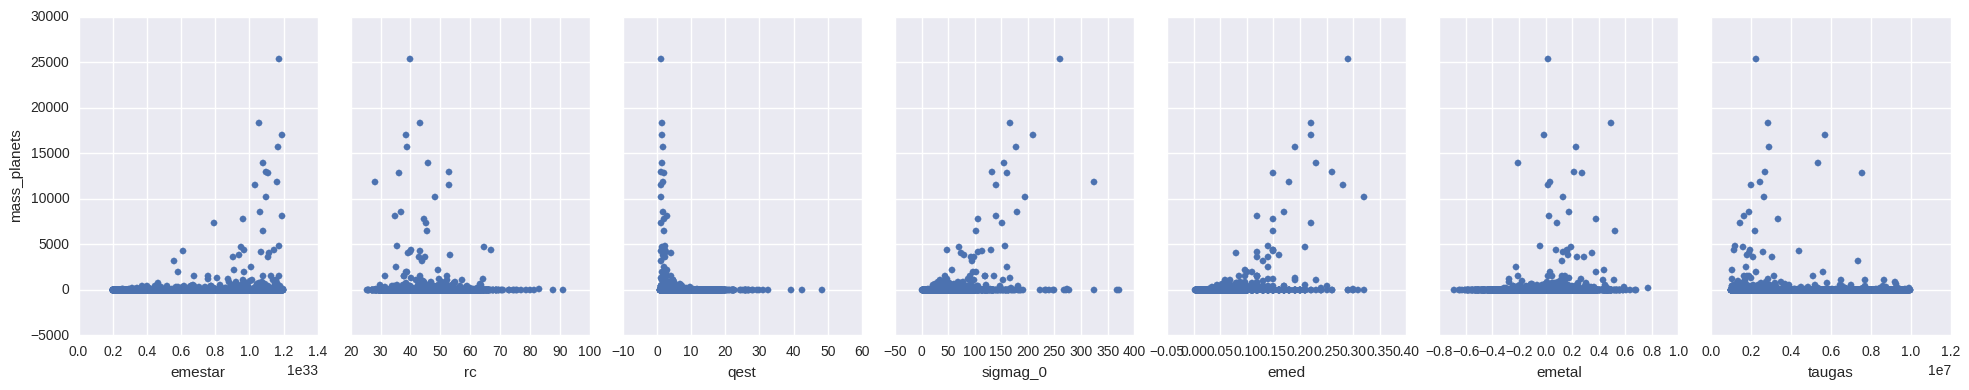

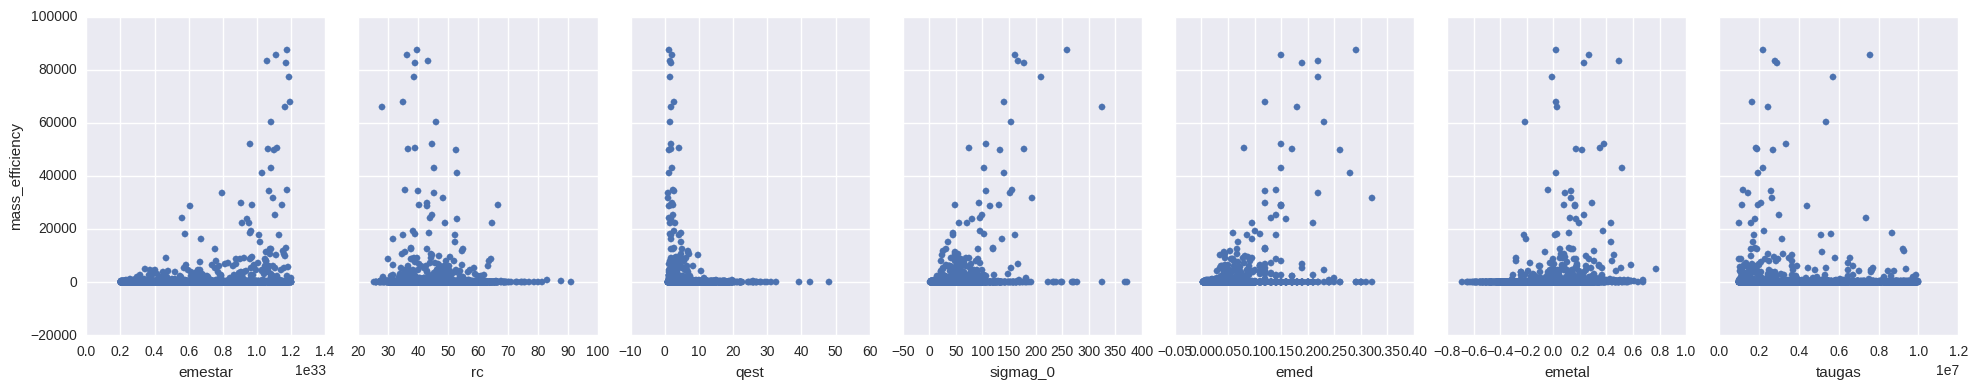

In [6]:
not_relevance=['ident','gama','apert','fpert','constmigI']

for i in not_relevance:
    data.remove(i)

X=lowp[data]
Y=lowp[target]

for i in target:
    sns.pairplot(lowp, x_vars=data, y_vars=i, size=4, aspect=0.7)

### RandomForestRegressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

Y=np.int_(np.array(Y))

rfr = RandomForestRegressor()
rfr.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

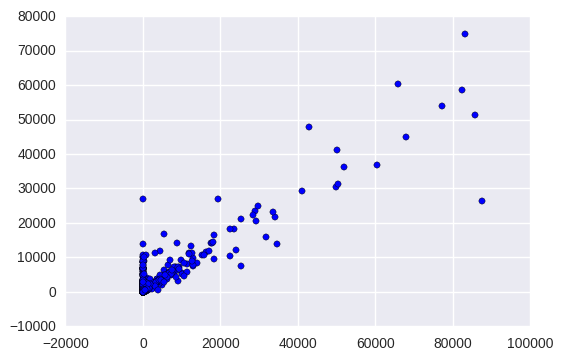

In [8]:
prediction = rfr.predict(X)
plt.scatter(Y, prediction)

In [9]:
ii = np.argsort(rfr.feature_importances_)

for name, value in zip(data, rfr.feature_importances_[ii]):
    print(name,"\t",value)

emestar 	 0.061113679708
rc 	 0.11993104241
qest 	 0.122995191935
sigmag_0 	 0.144315851752
emed 	 0.160796483665
emetal 	 0.181444580947
taugas 	 0.209403169583


In [10]:
scores = np.mean(cross_val_score(rfr, X, Y, cv=10))
print("Mean Score: ",scores)

Mean Score:  -0.648016456377


### Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

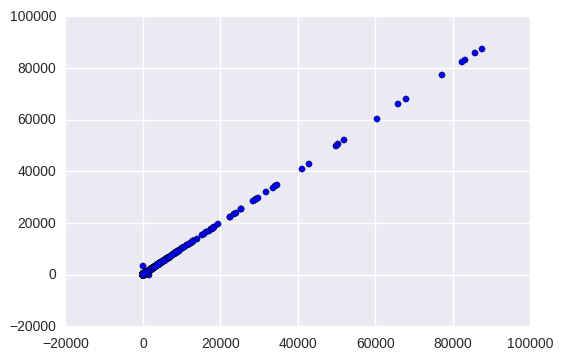

In [12]:
prediction = rfc.predict(X)
plt.scatter(Y, prediction)

In [13]:
ii = np.argsort(rfc.feature_importances_)

for name, value in zip(data, rfc.feature_importances_[ii]):
    print(name,"\t",value)

emestar 	 0.13131286601
rc 	 0.135750855279
qest 	 0.136043496964
sigmag_0 	 0.141129687258
emed 	 0.14212771772
emetal 	 0.15075975238
taugas 	 0.162875624387


# HighP

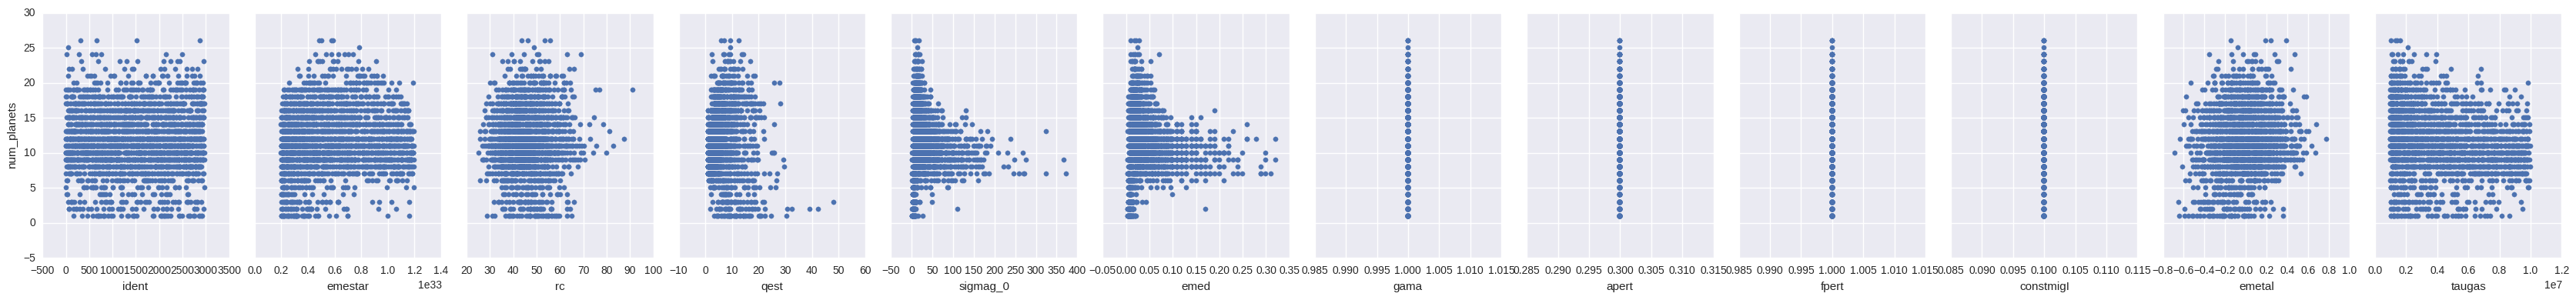

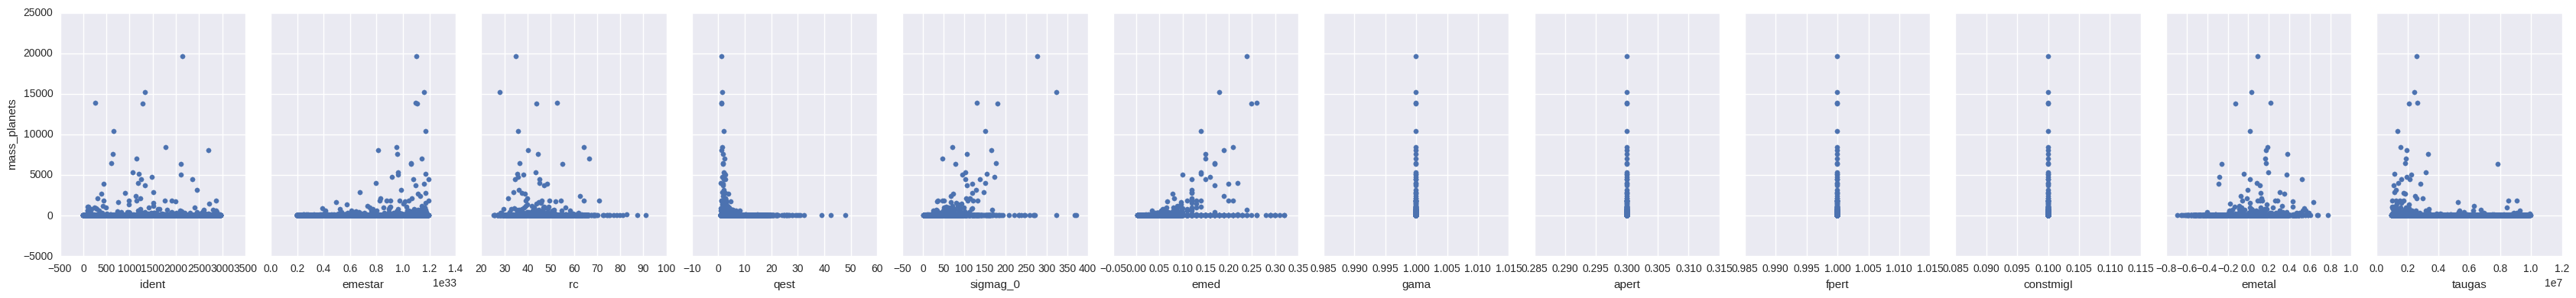

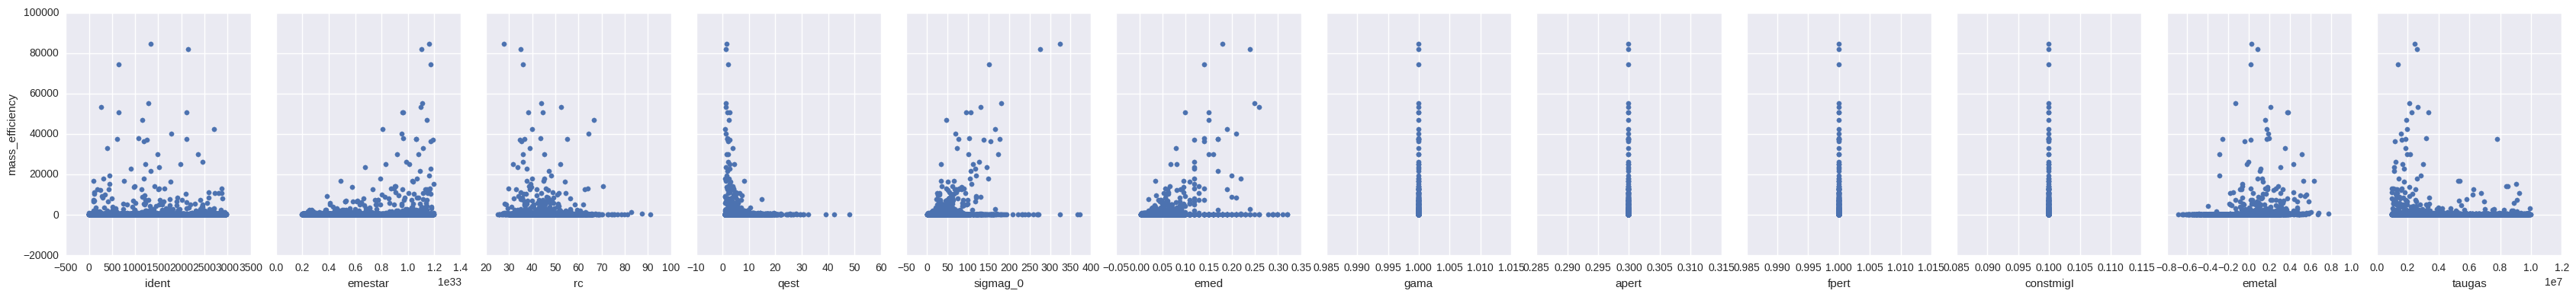

In [14]:
data = ['ident','emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
target = ['num_planets','mass_planets','mass_efficiency']

X=highp[data]
Y=highp[target]

for i in target:
    sns.pairplot(highp, x_vars=data, y_vars=i, size=4, aspect=0.7)

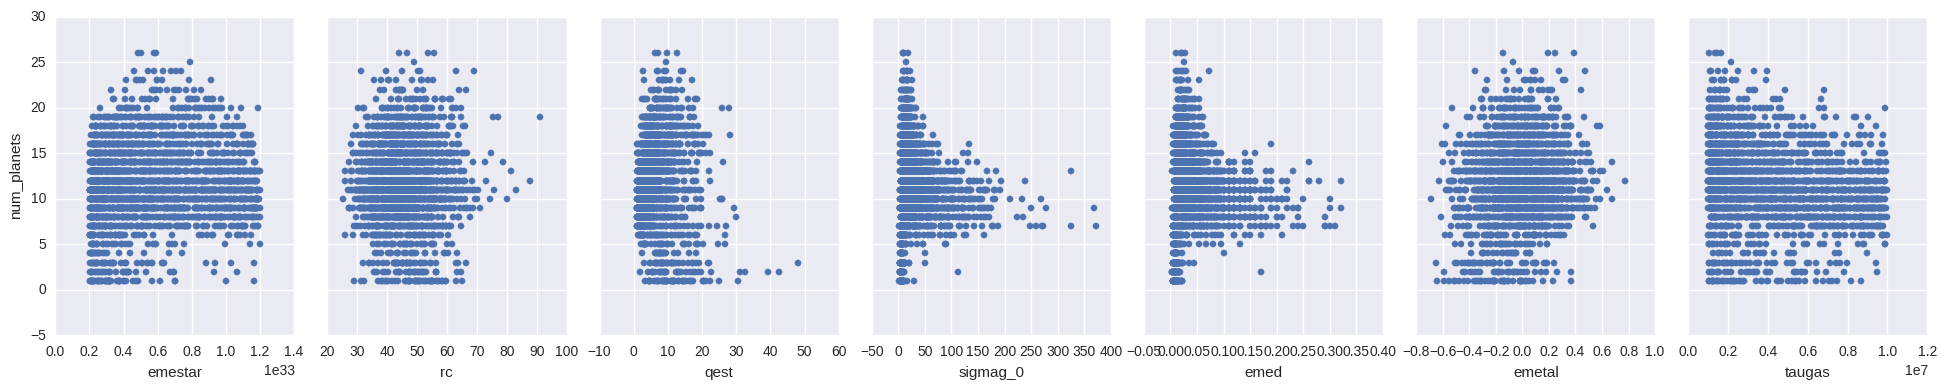

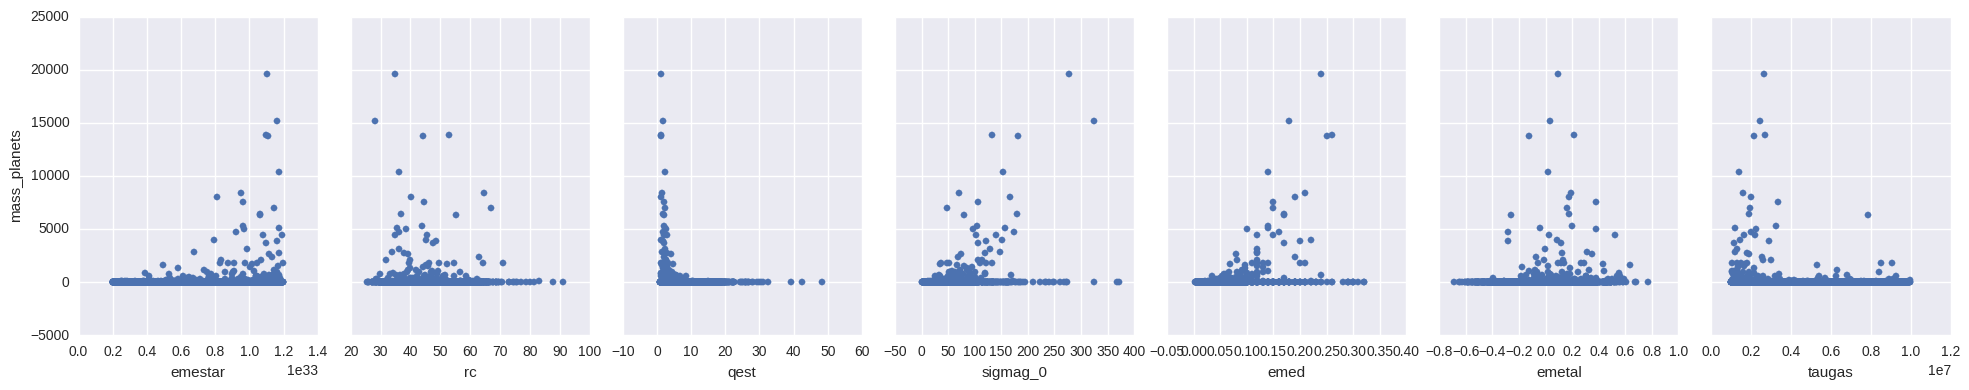

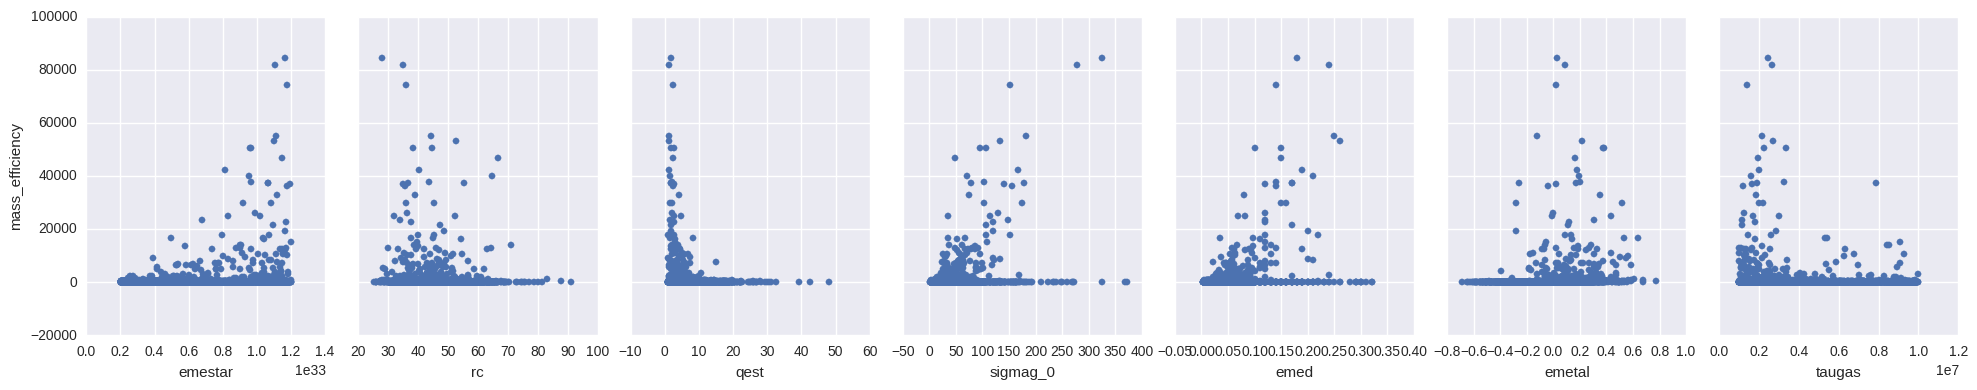

In [15]:
not_relevance=['ident','gama','apert','fpert','constmigI']

for i in not_relevance:
    data.remove(i)

X=highp[data]
Y=highp[target]

for i in target:
    sns.pairplot(highp, x_vars=data, y_vars=i, size=4, aspect=0.7)

### Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

Y=np.int_(np.array(Y))

rfr = RandomForestRegressor()
rfr.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

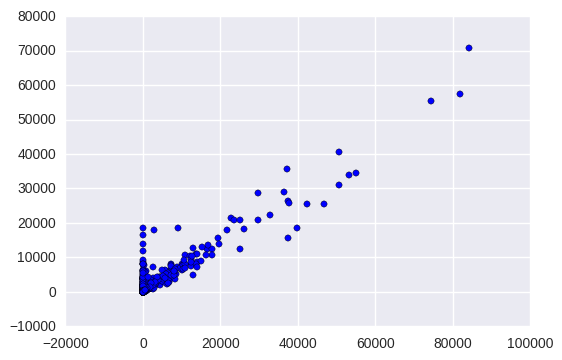

In [17]:
prediction = rfr.predict(X)
plt.scatter(Y, prediction)

In [18]:
ii = np.argsort(rfr.feature_importances_)

for name, value in zip(data, rfr.feature_importances_[ii]):
    print(name,"\t",value)

emestar 	 0.0970004694084
rc 	 0.108282448072
qest 	 0.11996440672
sigmag_0 	 0.123883341811
emed 	 0.143059826156
emetal 	 0.158506910793
taugas 	 0.249302597039


In [19]:
scores = np.mean(cross_val_score(rfr, X, Y, cv=10))
print(scores)

-0.263454336098


### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

Y=np.int_(np.array(Y))

rfc = RandomForestClassifier()
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

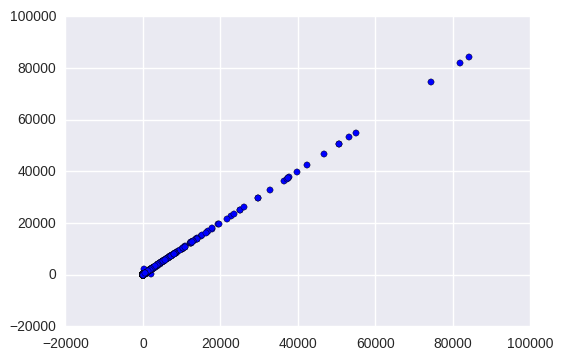

In [21]:
prediction = rfc.predict(X)
plt.scatter(Y, prediction)

In [22]:
ii = np.argsort(rfc.feature_importances_)

for name, value in zip(data, rfc.feature_importances_[ii]):
    print(name,"\t",value)

emestar 	 0.129775320598
rc 	 0.131940609903
qest 	 0.134278510138
sigmag_0 	 0.139923734263
emed 	 0.143508327233
emetal 	 0.151426097931
taugas 	 0.169147399936
